In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

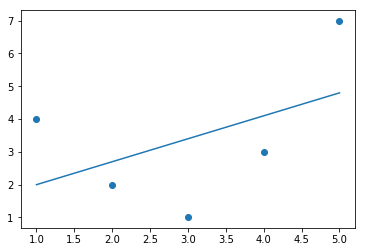

In [3]:
#Great time to use polynomial if you face the underfitting or overfitting
x=np.array([1,2,3,4,5])
y=np.array([4,2,1,3,7])
x=x[:,np.newaxis]
#default degree=1
model=LinearRegression()
model.fit(x,y)
yfit=model.predict(x)
#The degree is too low
plt.scatter(x,y)
plt.plot(x,yfit)

### Underfitting: Used the Polynomial algorithm

In [6]:
#add polynomial features
#try degree=3
poly=PolynomialFeatures(degree=3,include_bias=False)

### Transform the x to $$x, x^2 and x^3$$

In [7]:
x2=poly.fit_transform(x)
x2

array([[  1.,   1.,   1.],
       [  2.,   4.,   8.],
       [  3.,   9.,  27.],
       [  4.,  16.,  64.],
       [  5.,  25., 125.]])

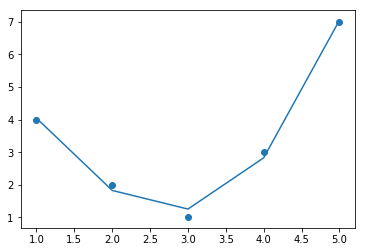

In [10]:
model=LinearRegression().fit(x2,y)
yfit=model.predict(x2)
plt.scatter(x,y)
plt.plot(x,yfit)

### Build many polynomial features to see the underfit, fit, or overfit

In [32]:
def PolynomialRegression(degree=2,**kwargs):
    return make_pipeline(PolynomialFeatures(degree),
                         LinearRegression(**kwargs))

In [33]:
def make_data(N,err=1,rseed=1):
    rng=np.random.RandomState(rseed)
    x=rng.rand(N,1)**2
    y=10-1/(x.ravel()+0.1)
    if err>0:
        y+=err*rng.randn(N)
    return x,y

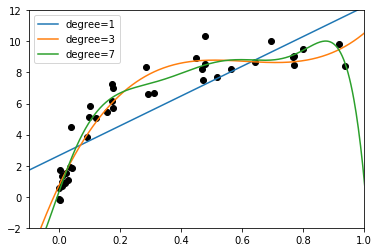

In [34]:
x,y=make_data(40)
x_test=np.linspace(-0.1,1.1,500)[:,None]
#Original dataset
plt.scatter(x.ravel(),y,color='black')
axis=plt.axis()
for degree in [1,3,7]:
    y_test=PolynomialRegression(degree).fit(x,y).predict(x_test)
    plt.plot(x_test.ravel(),y_test,label='degree={0}'.format(degree))
plt.xlim(-0.1,1.0)
plt.ylim(-2,12)
plt.legend(loc='best')

### Use to GridSearchCV to find the best parameters

In [35]:
from sklearn.grid_search import GridSearchCV

In [43]:
#Setup the range of paramaters you want to evaluate.
param_grid={'polynomialfeatures__degree':np.arange(21)}
grid=GridSearchCV(PolynomialRegression(),param_grid,cv=7)
grid.fit(x,y)

GridSearchCV(cv=7, error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('polynomialfeatures', PolynomialFeatures(degree=2, include_bias=True, interaction_only=False)), ('linearregression', LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False))]),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'polynomialfeatures__degree': array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20])},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=0)

In [44]:
grid.best_params_

{'polynomialfeatures__degree': 4}

In [58]:
grid.grid_scores_

[mean: -0.14985, std: 0.19680, params: {'polynomialfeatures__degree': 0},
 mean: 0.63872, std: 0.12568, params: {'polynomialfeatures__degree': 1},
 mean: 0.86502, std: 0.06198, params: {'polynomialfeatures__degree': 2},
 mean: 0.88409, std: 0.08001, params: {'polynomialfeatures__degree': 3},
 mean: 0.89569, std: 0.06784, params: {'polynomialfeatures__degree': 4},
 mean: 0.89564, std: 0.06343, params: {'polynomialfeatures__degree': 5},
 mean: 0.88068, std: 0.07905, params: {'polynomialfeatures__degree': 6},
 mean: 0.88346, std: 0.07188, params: {'polynomialfeatures__degree': 7},
 mean: 0.81507, std: 0.15457, params: {'polynomialfeatures__degree': 8},
 mean: 0.88517, std: 0.05559, params: {'polynomialfeatures__degree': 9},
 mean: -0.18304, std: 2.05903, params: {'polynomialfeatures__degree': 10},
 mean: -3.42709, std: 7.08504, params: {'polynomialfeatures__degree': 11},
 mean: -6.43146, std: 14.03712, params: {'polynomialfeatures__degree': 12},
 mean: -1058.82403, std: 2469.81830, params

In [60]:
#The best degree is 4
grid.best_params_

{'polynomialfeatures__degree': 4}

(-0.05673314103942452,
 0.994263633135634,
 -0.7459943120970807,
 10.918045992764213)

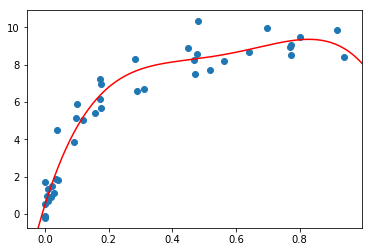

In [61]:
model=grid.best_estimator_
plt.scatter(x.ravel(),y)
lim=plt.axis()
y_test=model.fit(x,y).predict(x_test)
plt.plot(x_test.ravel(),y_test,c='r')
plt.axis(lim)